## Customer Segmentation Assignment

In [395]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [524]:
df = pd.read_csv("ockypocky.csv" ,delimiter="\t" , parse_dates=['Dt_Customer'] )
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


### Attributes description:
ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of kids in customer's home

Teenhome: Number of teenagers in customer's home

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if customer complained in the last 2 years, 0 otherwise

MntWines: Amount spent on wine in last 2 years
and likewise

NumDealsPurchases: Number of purchases made with a discount


AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise


NumWebPurchases: Number of purchases made through the company’s web site and likewise


In [525]:
df.shape

(2240, 29)

## Problem Statement

### 1. Find out the company's best customers according to the needs, history and spend type.  Perform cleaning and then clustering to consolidate customer segments.

#### a. If a user has done more higher education does he spends more?
#### b. Users who have kids at home are they likely to spend more money in gold?
#### c. How much is the impact of marital status of a user impact in spending on wine?  


# Part 1

#####  Data Preprocessing

###### missing values
There were 24 rows missing values in income, not too many so lets drop'em.

In [526]:
df.isnull().sum().sum()

24

In [527]:
df = df.dropna(how = "any").reset_index(drop=True)
df.shape

(2216, 29)

##### Check dtypes

In [528]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

All the attributes have been correctly identified,

#### Categorical data 

There are two categorical attributes marital status and education. These can ordinally encoded. Replacing rare(possible mistakes) values in marital status and assigning the minimum level of needs.

In [529]:
df.Marital_Status.value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [530]:
df.Marital_Status = df.Marital_Status.replace(["Absurd" , "YOLO" , "Alone"] ,"Single" )
print(df.Marital_Status.value_counts())

Married     857
Together    573
Single      478
Divorced    232
Widow        76
Name: Marital_Status, dtype: int64


In [531]:
# let's make attribute names simpler
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#### Numerical data 

In [532]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


a look at the five point summary table, min and max values look sane for most attributes. # income max 	666666.00
lets find out if there are outliers.

In [533]:
# calculating age from Year of birth
df.Year_Birth  = 2022 - df.Year_Birth 
df=df.rename(columns={"Year_Birth": "Age"})

In [534]:
y = []
for i in df.Dt_Customer:
    y.append(2022 - i.year)
df["tenure"] = pd.Series(y)

In [535]:
df = df.drop(columns= "Dt_Customer")

In [536]:
dfnum = df.select_dtypes(include = np.number)

In [537]:
la = dfnum.iloc[: ,1:17].columns
la

Index(['Age', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines', 'Fruits',
       'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth'],
      dtype='object')

### Distributions of important numerical variables 

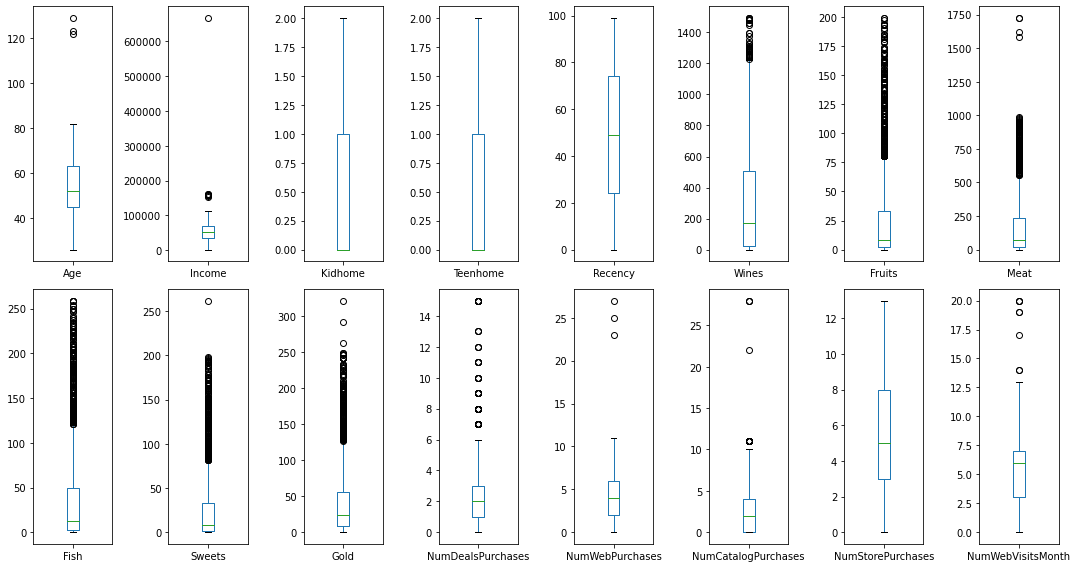

In [538]:
df[la].plot(kind = "box" , subplots = True , figsize = (15, 8)  , sharey = False , sharex = False , layout = (2,8))
plt.tight_layout()
plt.show()


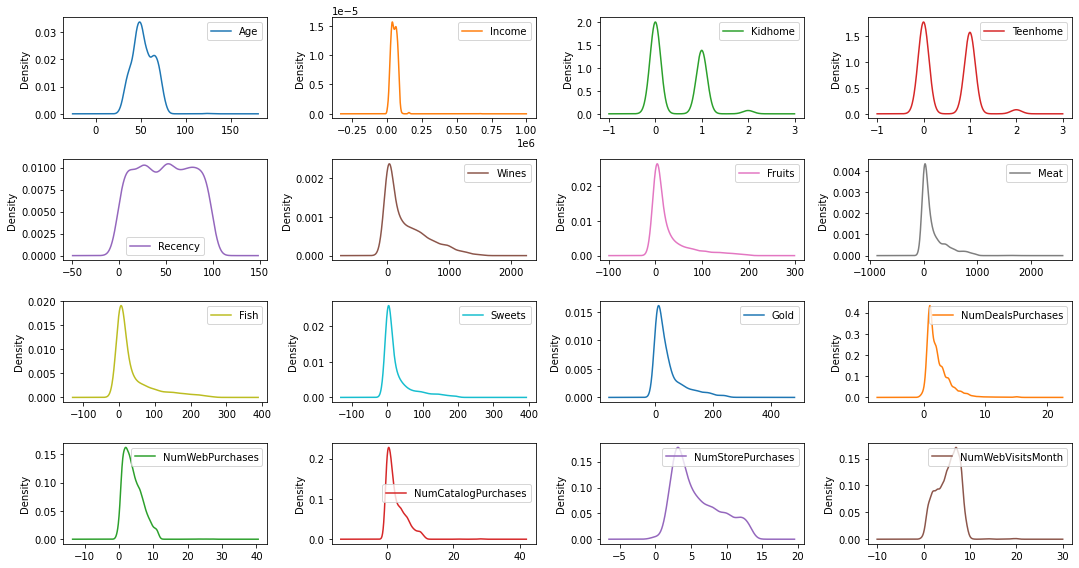

In [539]:
df[la].plot(kind = "kde" , subplots = True , figsize = (15, 8)  , sharey = False , sharex = False , layout = (4,4))
plt.tight_layout()
plt.show()

We have some extreme outliers in income, purchases, some people who've lived for over a century and in some attributes like fish,fruit,gold we the outliers are too many too far. lets treat them.

fig, ax = plt.subplots(nrows = 8, ncols = 2, figsize=(15, 30))

for variable, subplot in zip(dfnum.iloc[: ,1:17].columns, ax.flatten()):
    
    sns.boxplot(dfnum[variable], ax = subplot, color= "green")
    
plt.show()

#### alt dataframe

In [540]:
df1 = df.drop(columns=["ID"]).copy()

for i in la:

    print(df[i].quantile(0.995),' - ',df[i].max(),)
    
    print(df[i].quantile(0.005),"-", df[i].min())

#### Extreme outlier treatment

winsorization - capping outliers at upperbound values or 99.5 percentile and lower bound values of 0.5 percentile

In [541]:
for j in la:
    ub = df1[j].quantile(0.995)
    lb = df1[j].quantile(0.005)
    df1[j] = np.where(df1[j] > ub , ub , df1[j])
    df1[j] = np.where(df1[j] < lb , lb , df1[j])

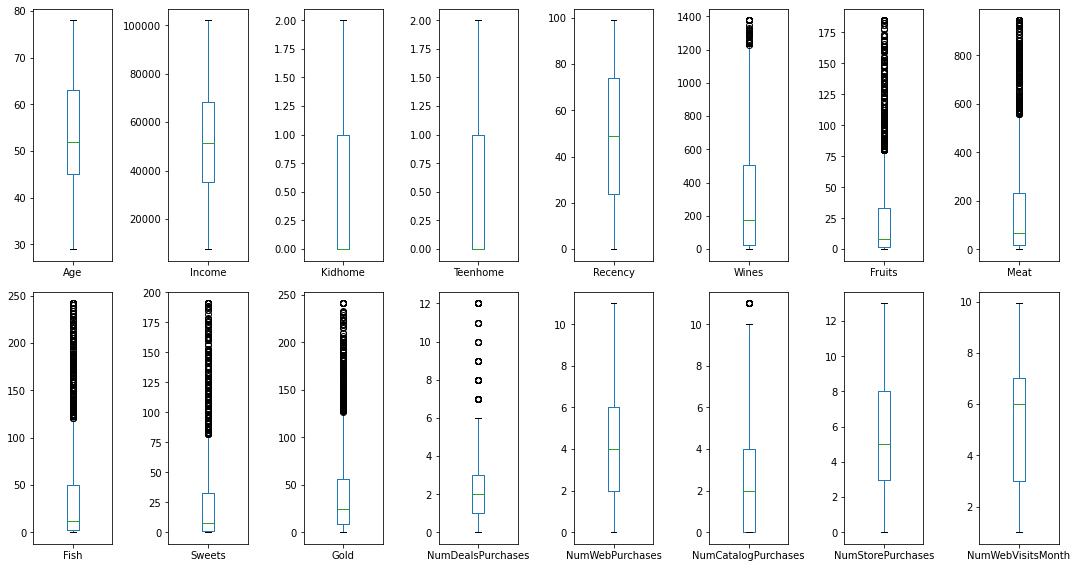

In [542]:
df1[la].plot(kind = "box" , subplots = True , figsize = (15, 8)  , sharey = False , sharex = False , layout = (2,8))
plt.tight_layout()
plt.show()

all right the distributions look better with extreme outliers gone, lets move on to segmentation.

## Step 2

## Unsupervised learning

## Clustering based on needs, history and spend type

In [543]:
df1.columns

Index(['Age', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'tenure'],
      dtype='object')

from my understanding so far, 

needs can be based on these factors = 'Income', age, marital status, and family size( kidhome , teenhome). 

history can be found out by= "Receny" ,tenure , 'Complain' , 'NumWebVisitsMonth','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases'

spend type could what spends on or how/where they spend. since i taken up how/where into history consideration here ill be going with what = 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold'

In [544]:
d2 = { "Single" : 1 , "Together" : 2 ,"Divorced" : 3 ,"Widow" : 4 , "Married" : 5}
df1.Marital_Status = df1.Marital_Status.map(d2)

In [545]:
c = ['Age', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold',
'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'tenure']

In [546]:
df2 = df1[c].copy()

## PCA

#### Scaling, finding principal components,

In [547]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
df_scaled = pd.DataFrame(rs.fit_transform(df1[c]), columns = c)

In [548]:
cov__matrix = df_scaled.cov()

eigval , eigvec = np.linalg.eig(cov__matrix)

In [549]:
eig_pairs = [(eigval[i], eigvec[:,i]) for i in range(len(eigval))]


eig_pairs.sort()

eig_pairs.reverse()
#print(eig_pairs)


eigvalues_sorted = [eig_pairs[i][0] for i in range(len(eigval))]
eigvectors_sorted = [eig_pairs[i][1] for i in range(len(eigval))]


#print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

In [550]:
 # individual variance 
ind_var = eigvalues_sorted/sum(eigvalues_sorted)

# cumulative variance
var_explained = np.cumsum(ind_var) 

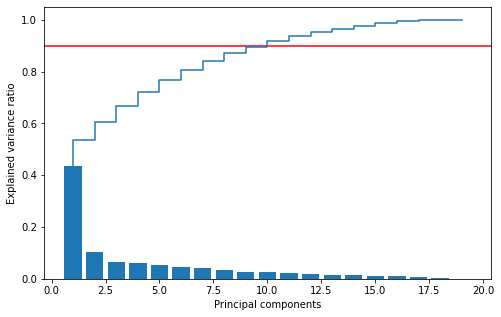

In [551]:
plt.rcParams["figure.figsize"] = (8,5)
plt.bar(range(1,len(eigval)+1) ,ind_var)
plt.axhline(0.90, color = "r")
plt.step(range(1,len(eigval)+1) , var_explained)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

plt.plot(ind_var )

plt.plot(ind_var , "r*")
plt.show()

In [552]:
from sklearn.decomposition import PCA
# selecting components such that 90 % variance is explained
pca = PCA(n_components= 0.9) 

In [553]:
components = pca.fit_transform(df_scaled)
df_c = pd.DataFrame(components , columns= ["pc"+str(i) for i in range(1,12)])

In [554]:
# data frame of principal components
df_c.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,4.486231,0.378694,0.818028,0.043831,0.009748,1.490900,-0.035631,-0.787248,0.721504,0.484173,-0.544729
1,-2.099099,-0.608314,-0.318529,-0.168568,-0.143819,-0.455389,1.048198,0.300109,0.408622,0.580041,-0.720045
2,1.410783,-0.314982,-0.394146,0.271083,-0.528098,0.677824,0.720913,-0.756925,-1.020470,-0.544150,-0.526748
3,-2.055278,-0.991705,0.293195,0.273903,0.025652,0.185171,0.020408,0.943195,-0.622568,-0.103992,-0.396607
4,-0.058422,0.152042,0.958029,-0.430500,-0.693720,0.299887,0.326305,1.423949,0.281772,-1.049889,0.671657


## finding optimal number of clusters 

In [555]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [556]:
wcss = []
s_score = []

for i in range(2,7):
    km = KMeans( n_clusters= i)
    km.fit(df_c)
    wcss.append(km.inertia_)
    s_score.append(silhouette_score(df_c , km.labels_))

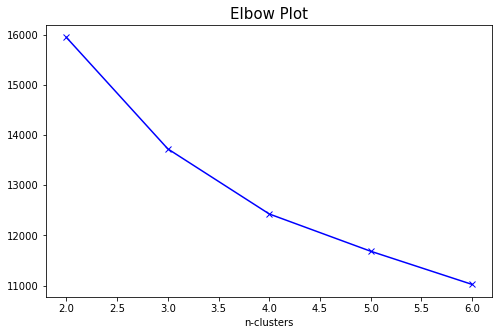

In [557]:
plt.plot(range(2,7) , wcss,'bx-')
plt.title("Elbow Plot" ,fontsize = 15)
plt.xlabel('n-clusters')
plt.show()

plt.bar(range(2,7) , s_score)
plt.show()

the optimal number of cluster can be between 3,5. i've gone a bit of back of forth considering the problem statement and chose 3,
because these cluster make business sense

In [562]:
fk_model = KMeans(n_clusters= 3) 
fk_model.fit(df_c)
k_pred = fk_model.labels_

In [563]:
df1["k_pred"] = k_pred

In [564]:
df1.shape

(2216, 29)

## Visualization of clusters

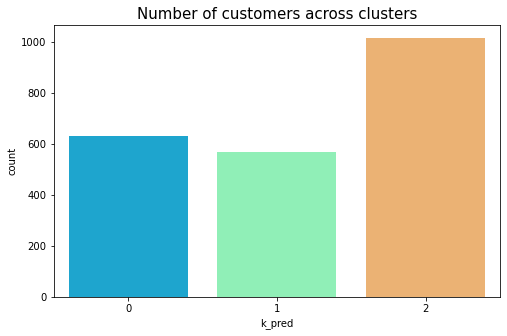

In [565]:
sns.countplot(df1.k_pred , palette= "rainbow")
plt.title("Number of customers across clusters" , fontsize = 15 )
plt.show()

we have three clusters, and the above the counts across clusters. cluster 2 is the largest.

## Distributions of clusters across needs

In [566]:
needs = ['Age', 'Income', 'Kidhome', 'Teenhome','Marital_Status' ]

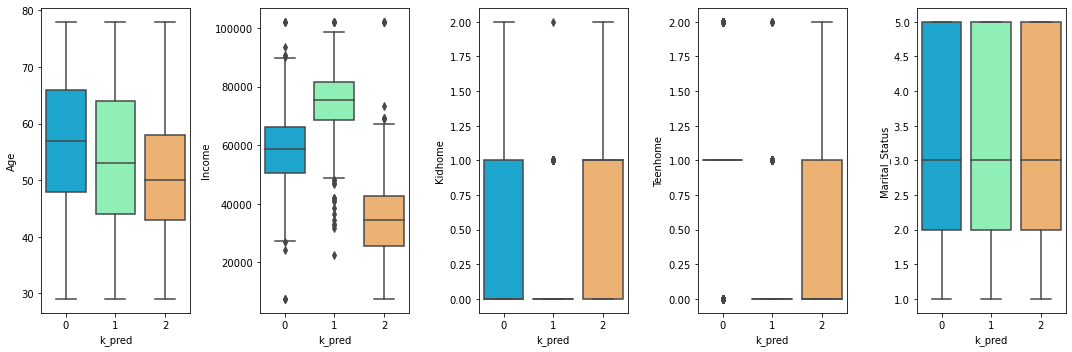

In [567]:
fig, ax = plt.subplots(nrows = 1 , ncols = 5 , figsize=(15, 5))

plt.tight_layout()   

for variable, subplot in zip( needs, ax.flatten()):
    
    sns.boxplot( df1["k_pred"],df1[variable], ax = subplot,palette= "rainbow" )

    plt.tight_layout()
    
plt.show()

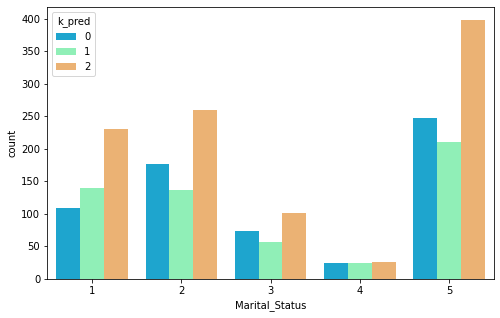

In [568]:
sns.countplot(df1.Marital_Status , hue = df1.k_pred , palette= "rainbow")
plt.show()

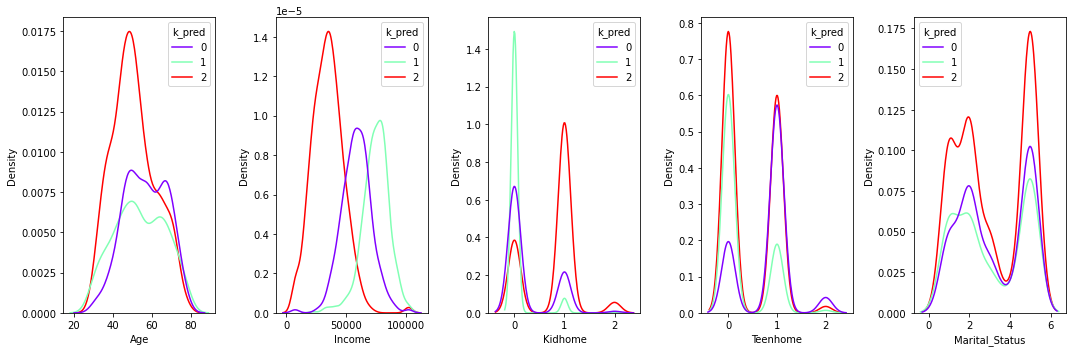

In [569]:
fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize=(15, 5))

for variable, subplot in zip(needs, ax.flatten()):
    
    sns.kdeplot(df1[variable],hue= df1["k_pred"], ax = subplot , palette= "rainbow" )


plt.tight_layout()   

plt.show()

In [570]:
pd.pivot_table(data= df1[needs] , index= df1.k_pred)

,Age,Income,Kidhome,Marital_Status,Teenhome
k_pred,,,,,
0,56.612342,58739.039953,0.261076,3.199367,0.810127
1,53.685413,74498.082601,0.052724,3.056239,0.254833
2,50.626601,34804.236207,0.772414,3.101478,0.456158


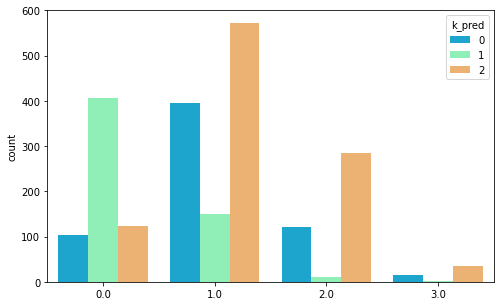

In [571]:
sns.countplot(df1.Kidhome+df1.Teenhome , hue = df1.k_pred , palette= "rainbow")
plt.show()

#### Inferences

1. we have three cluster, and the average age gradually decreases across 0,1,2

2. cluster 1 has the highest median income followed by 0 and 2

3. cluster 1 has least number of kids and teens

4. There isnt much variation with respect to marital status across clusters
 


## Distributions of clusters across history

In [572]:
history = ['Recency','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'tenure']

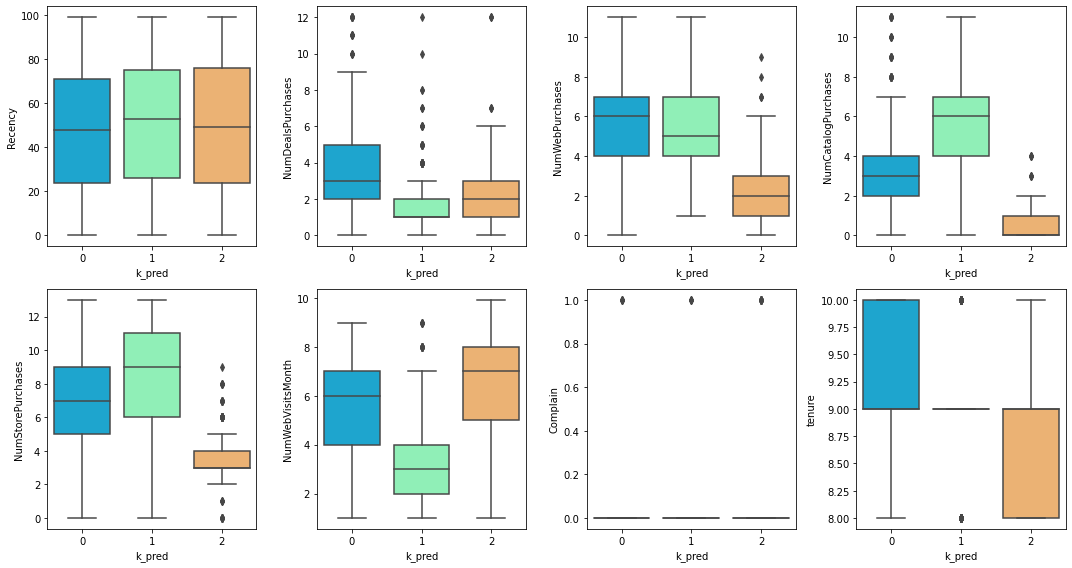

In [573]:
fig, ax = plt.subplots(nrows = 2 , ncols = 4 , figsize=(15, 8))

plt.tight_layout()   

for variable, subplot in zip( history, ax.flatten()):
    
    sns.boxplot( df1["k_pred"],df1[variable], ax = subplot,palette= "rainbow" )

    plt.tight_layout()
    
plt.show()

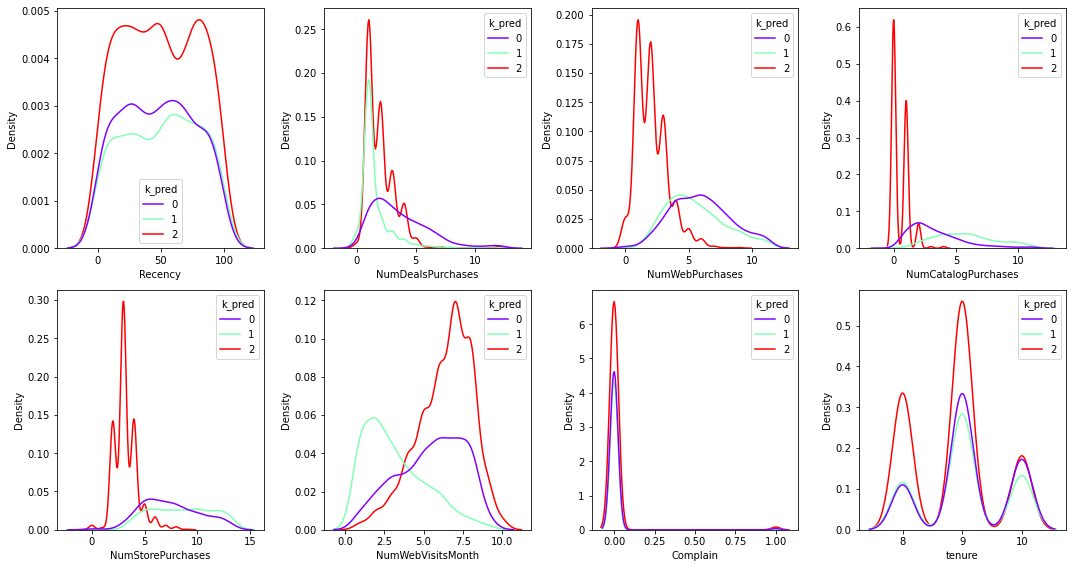

In [574]:
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize=(15, 8))

for variable, subplot in zip(history, ax.flatten()):
    
    sns.kdeplot(df1[variable],hue= df1["k_pred"], ax = subplot , palette= "rainbow" )


plt.tight_layout()   

plt.show()

In [575]:
pd.pivot_table(data= df1[history] , index= df1.k_pred)

,Complain,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,tenure
k_pred,,,,,,,,
0,0.007911,3.278481,3.587025,7.481013,5.950949,5.468354,47.865506,9.101266
1,0.007030,5.732865,1.504394,8.539543,5.518453,3.188049,50.177504,9.031634
2,0.011823,0.515271,1.972414,3.219704,2.078818,6.364631,49.073892,8.857143


### Inferences

1. average complaints across cluster 0 and 1 are significantly less than 2.

2. cluster 1 has high catalog , store and web purchases and low deals( discount deal remember !), looks like we have a winner. but wait median the number of visits is low . since ive already the the nexts graphs i know cluster 1 spends as much or more so the conversion rate is high too , great. 

3. There is not much deviation across tenure and recency.




## Distributions of clusters across spend type

In [425]:
 spends = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']

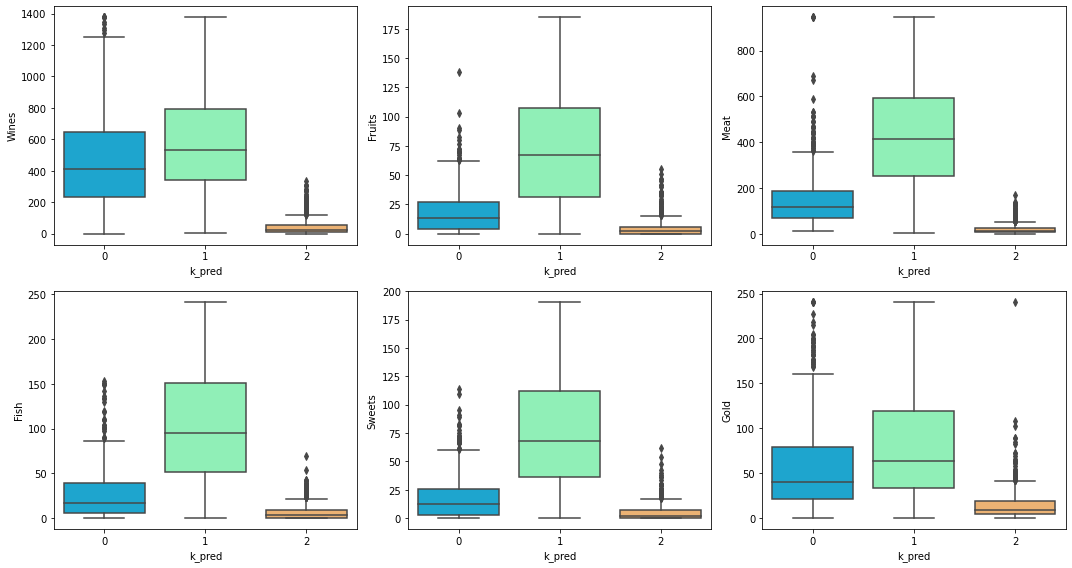

In [426]:
fig, ax = plt.subplots(nrows = 2 , ncols = 3 , figsize=(15, 8))

plt.tight_layout()   

for variable, subplot in zip( spends, ax.flatten()):
    
    sns.boxplot( df1["k_pred"],df1[variable], ax = subplot,palette= "rainbow" )

    plt.tight_layout()
    
plt.show()

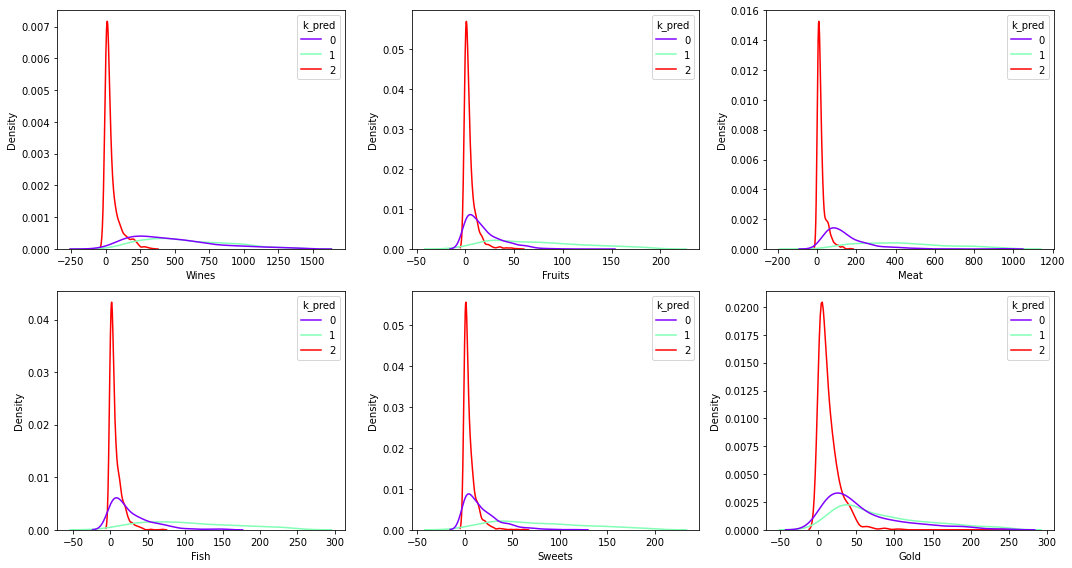

In [427]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(15, 8))

for variable, subplot in zip(spends, ax.flatten()):
    
    sns.kdeplot(df1[variable],hue= df1["k_pred"], ax = subplot , palette= "rainbow" )


plt.tight_layout()   

plt.show()

In [576]:
pd.pivot_table(data= df1[spends] , index= df1.k_pred)

,Fish,Fruits,Gold,Meat,Sweets,Wines
k_pred,,,,,,
0,26.822785,18.227848,57.971519,149.139557,17.504747,478.570016
1,105.295606,74.133743,82.186292,440.306503,77.137434,579.576011
2,6.322167,4.541872,13.637438,21.921182,4.763547,42.276847


### Inferences

1. cluster 1 has higher median across all spend categories, these are the best customers.

# Part 2

#### a. If a user has done more higher education does he spends more?

In [580]:
df2 = df1.copy()

In [581]:
d = { "Basic" : 1 , "2n Cycle" : 1 , "Graduation" : 2 ,"Master": 3 , "PhD" : 4}
df2.Education = df2.Education.map(d)
df2.Education.value_counts()

2    1116
4     481
3     365
1     254
Name: Education, dtype: int64

In [582]:
# ordinal encode to different levels

In [583]:
# calculating total across spend categories
df2["total"] = df2[spends].sum(axis = 1)

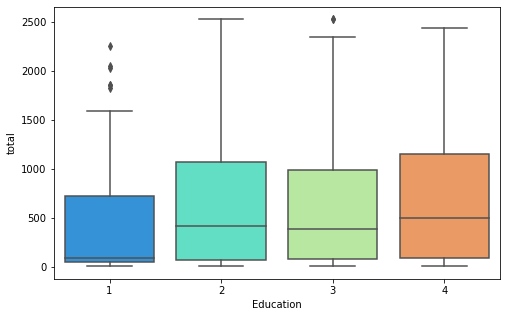

In [584]:
sns.boxplot(df2.Education ,df2.total,palette= 'rainbow' )
plt.show()

We see the median is low for level 1 and slightly high for level 4. lets do a anova to find out.

In [586]:
df.Education.value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [587]:
# 1. check if distribuion is normal
from scipy.stats import shapiro,f_oneway
stat ,p= shapiro(df2['total'])
np.round(p )   

0.0

In [588]:
g1 = df2[df2.Education == 1]["total"]
g2 = df2[df2.Education == 2]["total"]
g3 = df2[df2.Education == 3]["total"]
g4 = df2[df2.Education == 4]["total"]


In [597]:
from scipy import stats as st
from scipy.stats import kruskal

In [595]:
f_stat, p_val = st.f_oneway(g1,g2,g3,g4)
print(np.round(p_val))

0.0


In [604]:
f_stat, p_val = st.f_oneway(g3,g2)
print(np.round(p_val))

1.0


the pval across all groups is close to zero,hence we can say there is significant variation across alteast one educaton level.

pval for f_oneway for the middle two levels is 1,

At 95% significance we can say if education level does effect amount spent.


In [601]:
#kruskal(g1,g2,g3,g4)

#### b. Users who have kids at home are they likely to spend more money in gold?

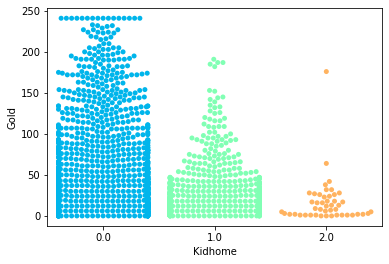

In [452]:
sns.swarmplot(df2.Kidhome ,df2.Gold,palette= 'rainbow' )
plt.show()

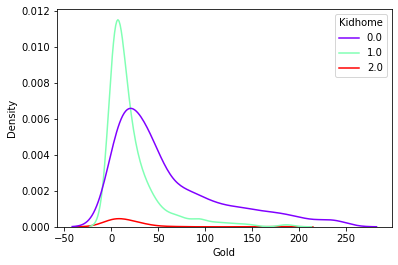

In [455]:
sns.kdeplot(df2.Gold,hue = df2.Kidhome ,palette= 'rainbow' )
plt.show()

In [509]:
df2["kids"] = df2.Kidhome +df2.Teenhome

In [513]:
df2["kids"] = df2["kids"].apply(lambda x : 1 if x > 0 else 0)

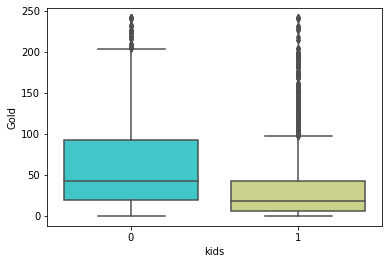

In [522]:
sns.boxplot(df2.kids ,df2.Gold,palette= 'rainbow' )
plt.show()

The median seems to be high for the group without kids.lets test

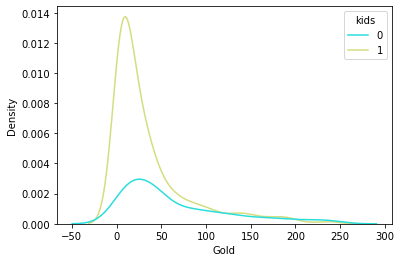

In [514]:
sns.kdeplot(df2.Gold,hue = df2.kids ,palette= 'rainbow' )
plt.show()

In [515]:
k1 = df2[df2.kids == 1]["Gold"]
k0 = df2[df2.kids == 0]["Gold"]

In [523]:
t_stat , pval = st.f_oneway(k1 ,k0)
np.round(pval)

0.0

In [607]:
t_stat , pval = st.ttest_ind(k1 ,k0)
np.round(pval)

0.0

the pval across both groups is close to zero,

At 99% significance we can say there is no influence of kids on gold purchases

#### c. How much is the impact of marital status of a user impact in spending on wine?  

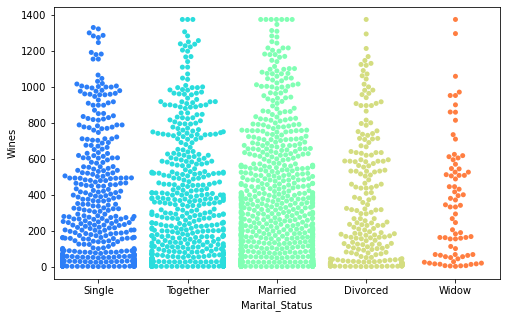

In [609]:
sns.swarmplot( df.Marital_Status ,df2.Wines,palette= 'rainbow' )
plt.show()

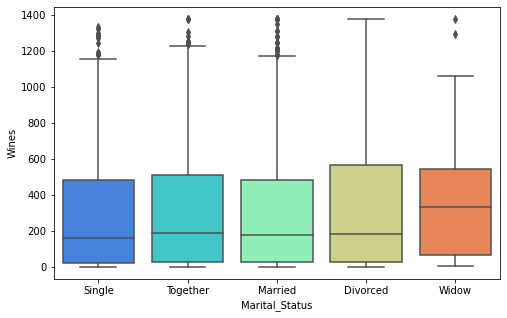

In [610]:
sns.boxplot( df.Marital_Status ,df2.Wines,palette= 'rainbow' )
plt.show()

The median is high for widowers, lets check.

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Wines ~ Marital_Status' , data = df2 ).fit()

anova_result = sm.stats.anova_lm(model , typ = 2)
print(anova_result)

In [623]:
pd.pivot_table(data= df2[["Wines" ,"Marital_Status" ]] , index= df.Marital_Status)

,Marital_Status,Wines
Marital_Status,,
Divorced,3,324.490302
Married,5,299.248833
Single,1,291.058577
Together,2,307.967277
Widow,4,366.009868


In [624]:
h1 = df2[df2.Marital_Status == 1]["Wines"]
h2 = df2[df2.Marital_Status == 2]["Wines"]
h3 = df2[df2.Marital_Status == 3]["Wines"]
h4 = df2[df2.Marital_Status == 4]["Wines"]
h5 = df2[df2.Marital_Status == 5]["Wines"]

In [629]:
f_stat, pval = st.f_oneway(h1,h2,h3,h4,h5)
print(np.round(pval,3))

0.354


The p_value is very large 0.05, hence we can say that marital status affect amount apent on wine.

In [630]:

f_stat, pval = st.f_oneway(h1,h5)
print(np.round(pval,3))

0.669


even considering just single and married groups there is a variance.

## End

##### rough code

df1 = df1.drop(columns= "k_pred")

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

s_score = []
for i in range(2,10):
    am = AgglomerativeClustering( n_clusters= i)
    am.fit(df_scaled)
    
    s_score.append(silhouette_score(df_scaled , am.labels_))

#plt.bar(range(2,10) , s_score)

from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist 

df1.Marital_Status.value_counts()

needs =  'Marital_Status','MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'

history = 'Recency', 'NumWebVisitsMonth',

spend type = 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases'

lb = ['Kidhome', 'Teenhome',"Marital_Status" ,'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','Recency', 'NumWebVisitsMonth','NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']

df1[lb].head()

#from sklearn.cluster import KMeans
#from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
df_scaled = pd.DataFrame(rs.fit_transform(df1[lb]), columns = lb).reset_index(drop=True)

wcss  = []

for k in range(1,15):
    kmeans = KMeans(n_clusters = k, random_state = 10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = [7,5]
plt.plot(range(1,15), wcss , '-^')

plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)
plt.axvline(x = 4, color = 'red')

plt.show()

n_clusters = [2, 3,4,5,6]

for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, predict, random_state= 10)
    print ("For {} clusters the silhouette score is {})".format(K, score))

new_clusters = KMeans(n_clusters = 2, random_state = 10)

new_clusters.fit(df_scaled)

df1['Cluster1'] = new_clusters.labels_

df1.head()

lc = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',"Cluster1"]

#sns.pairplot(df1[lc] , diag_kind= "kde" , hue= "Cluster1")
#plt.show()

c_s = []
for i in ["average" , 'complete' , 'ward' ]:
    Z = linkage(df, i)
    c, coph_dists = cophenet(Z , pdist(df_c))
    c_s.append(c)